In [91]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os
from scipy import stats
from scipy.stats import norm
plt.style.use('ggplot')
sys.path.append(os.path.abspath("../../shared"))
import eda
from sklearn.preprocessing import LabelEncoder
import feature_selection
%matplotlib inline

## Read in the data

In [48]:
train = pd.read_csv('train.csv')

## Renaming some columns 

In [49]:
renaming = {
    'MSSubClass' : 'BuildingClass',
    'MSZoning' : 'ZoningClass',
    'LotFrontage' : 'AmountOfStreet',
    'Street' : 'RoadAccessType',
    'Alley' : 'AlleyAccessType',
    'LandContour' : 'Flatness',
    'Condition1' : 'ProximityToRoadRail1',
    'Condition2' : 'ProximityToRoadRail2',
    'OverallQual' : 'MaterialQuality',
    'OverallCond' : 'ConditionRating',
    'YearRemodAdd' : 'RemodelDate',
    'RoofStyle' : 'RoofType',
    'RoofMatl' : 'RoofMaterial',
    'Heating' : 'HeatingType',
    'HeatingQC' : 'HeatingQualityCond',
    'LowQualFinSF' : 'LowQualityFinshedSF',
    'Functional' : 'HomeFunctionalRating',
    'FireplaceQu' : 'FireplaceQuality',
    '3SsnPorch' : 'ThreeSeasonPorchArea',
    'PoolQC' : 'PoolQualityCond',
    'MoSold' : 'MonthSold',
    'YrSold' : 'YearSold',
    'Fence' : 'FenceQuality'
}

train.rename(index=str, inplace=True, columns=renaming)
test.rename(index=str, inplace=True, columns=renaming)

## Get baseline model as quick as possible

In [50]:
train.head()

,Id,BuildingClass,ZoningClass,AmountOfStreet,LotArea,RoadAccessType,AlleyAccessType,LotShape,Flatness,Utilities,LotConfig,LandSlope,Neighborhood,ProximityToRoadRail1,ProximityToRoadRail2,BldgType,HouseStyle,MaterialQuality,ConditionRating,YearBuilt,RemodelDate,RoofType,RoofMaterial,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingType,HeatingQualityCond,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualityFinshedSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,HomeFunctionalRating,Fireplaces,FireplaceQuality,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSeasonPorchArea,ScreenPorch,PoolArea,PoolQualityCond,FenceQuality,MiscFeature,MiscVal,MonthSold,YearSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQualityCond,1453,0.995205
MiscFeature,1406,0.963014
AlleyAccessType,1369,0.937671
FenceQuality,1179,0.807534
FireplaceQuality,690,0.472603
AmountOfStreet,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Dropping all columns w/ missing data. These are likely to contain outliers anyway

In [52]:
temp = train.copy()
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
print(train.isnull().any().any())

False


In [53]:
train.shape

(1459, 63)

In [54]:
from sklearn.ensemble import RandomForestRegressor
train_no_na = train.copy()
train_no_na = train_no_na.dropna(how='all')
random_forest_baseline = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42);
random_forest_baseline.fit(train_no_na, y);

In [55]:
# From the docs, The RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a 
# bootstrap sample of the training observations z_i = (x_i, y_i). The out-of-bag (OOB) error is the average error for 
# each z_i calculated using predictions from the trees that do not contain z_i in their respective bootstrap sample
# The study of error estimates for bagged classifiers in Breiman [1996b], gives empirical evidence to show that the out-of-bag 
# estimate is as accurate as using a test set of the same size as the training set. Source: https://www.quora.com/What-is-the-out-of-bag-error-in-random-forests-What-does-it-mean-Whats-a-typical-value-if-any-Why-would-it-be-higher-or-lower-than-a-typical-value
random_forest_baseline.oob_score_
from sklearn import metrics
y_oob = random_forest_baseline.oob_prediction_
# For this metric, the higher the number (max is 1), the better the predictions
print('explained_variance_score = ', metrics.explained_variance_score(y, y_oob))
# A total of 17597 dollars off over the entire training set, not bad
print('mean_absolute_error = ', metrics.mean_absolute_error(y, y_oob))

explained_variance_score =  0.868964073092
mean_absolute_error =  17182.5077307


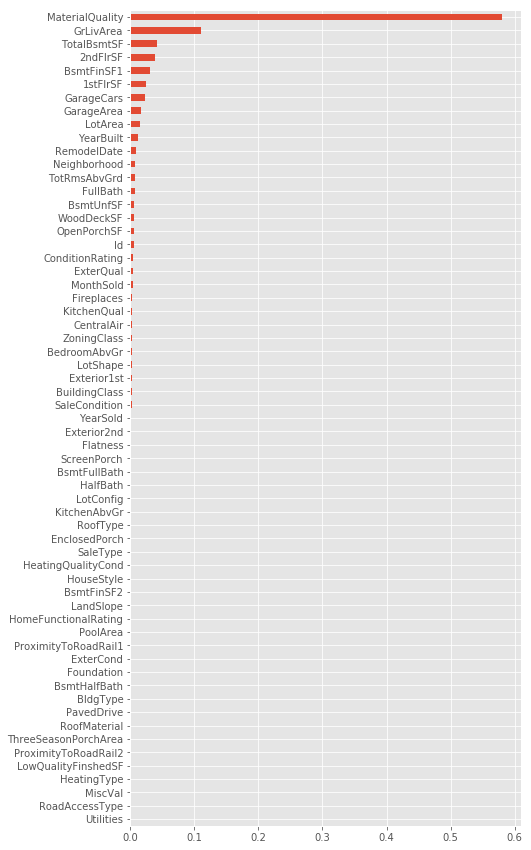

In [56]:
# We will use these feature importances as a baseline later on when we do some feature engineering
baseline_feature_importances = eda.feature_importances(random_forest_baseline, train_no_na)

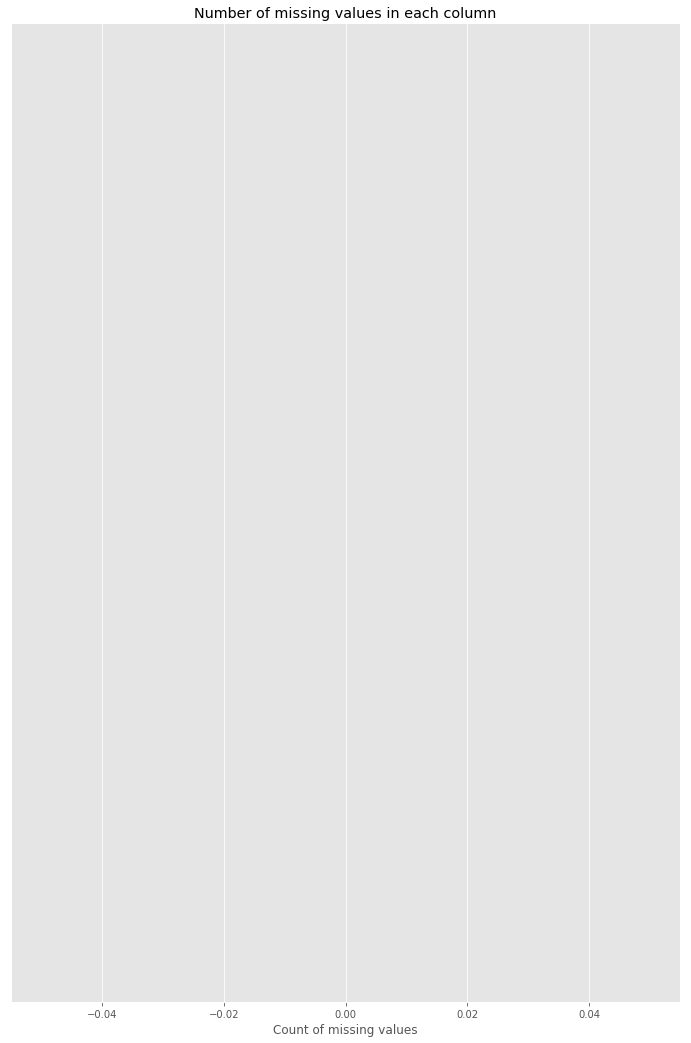

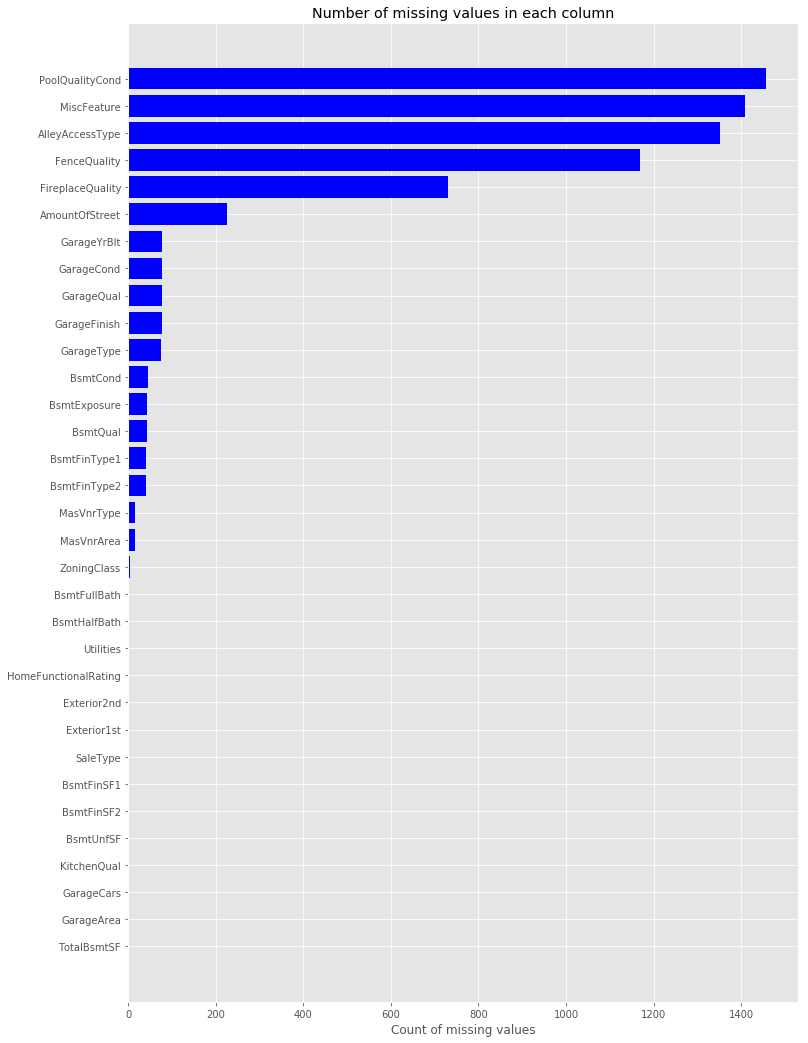

In [57]:
missing_df = eda.missing_values(train)
missing_df = eda.missing_values(test)

## Now that we have a baseline model, let's set about improving it. We will attempt to do this via intelligently imputing the data, training only on important features, feature engineering (to some extent), finding optimal hyperparameters for the model, and possibly trying out other models as well. First, let's impute the data

## Correlation Analysis

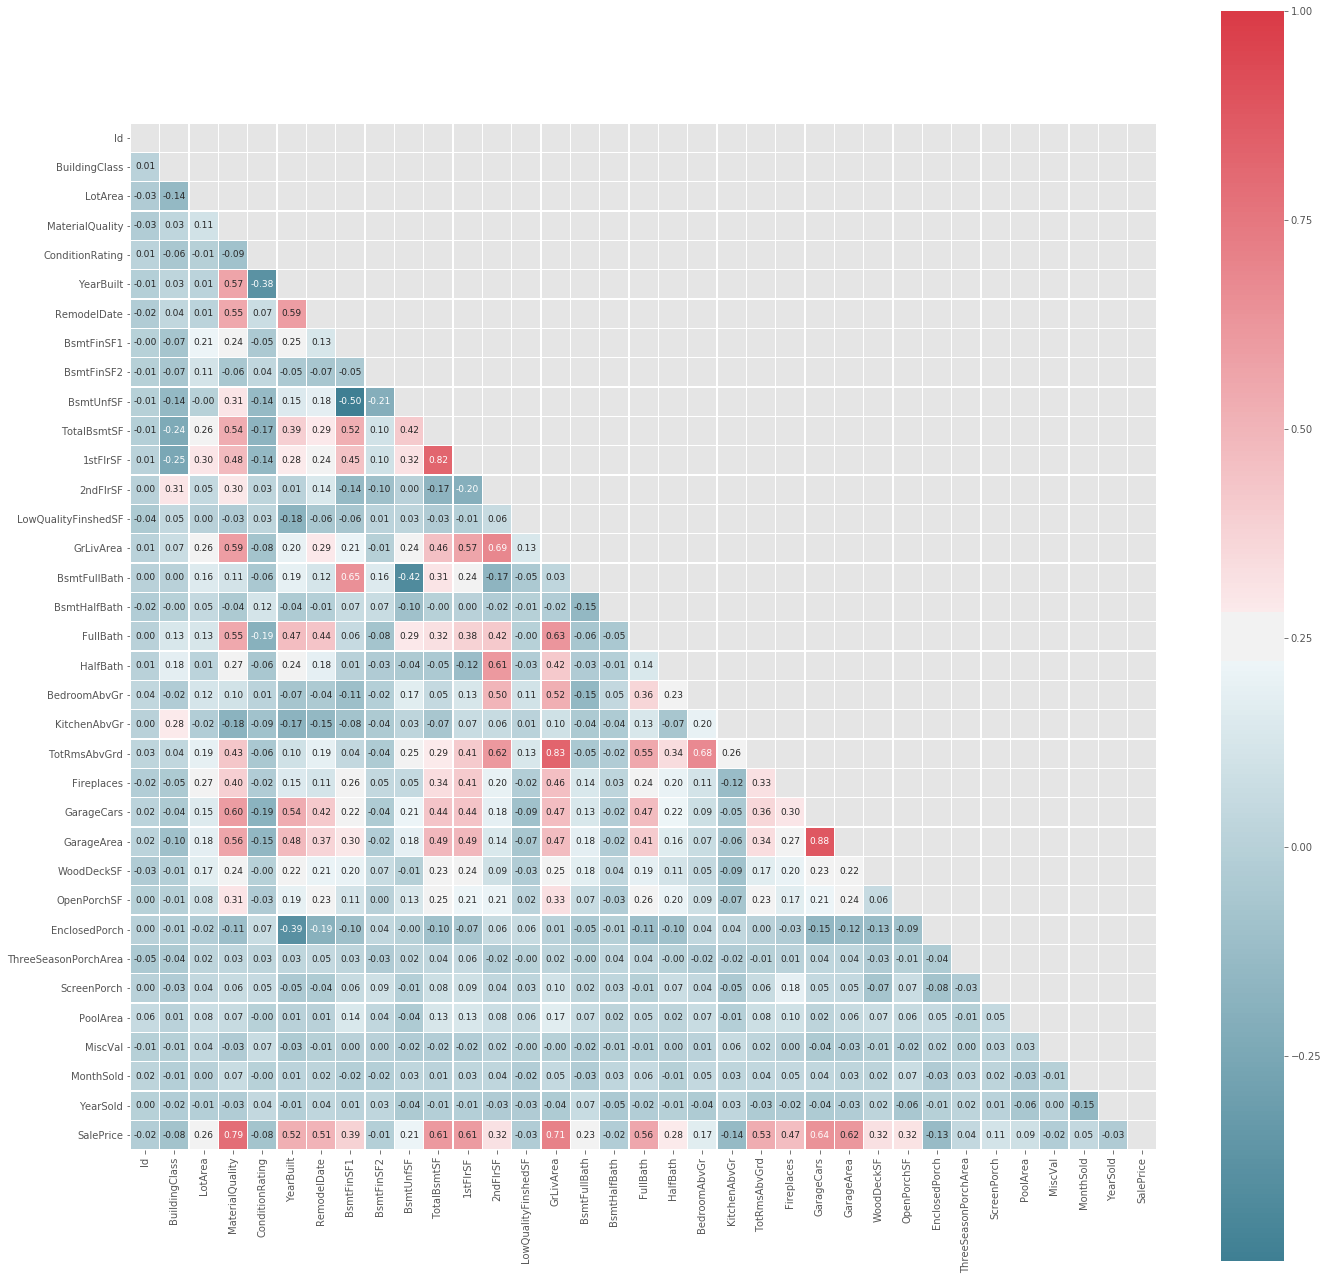

In [58]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
upper_right_mask = np.triu_indices_from(train[numerical_features].corr())
corr = train[numerical_features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(23, 23))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True,linewidths=.5,annot=True, fmt='.2f',annot_kws={"size": 9}, mask=mask, cmap=cmap);

### Preliminary EDA, variables that probably make a difference based off correlation analysis, feature importances, and general thoughts
<ul>
    <li>Material Quality</li>
    <li>LotArea</li>
    <li>YearBuilt</li>
    <li>GrLivArea</li>
    <li>TotalBsmtSF</li>
    <li>GarageArea/GarageCars</li>
    <li>FullBath/HalfBath</li>
    <li>Fireplaces</li>
    <li>Most square feet related features</li>
    <li>Neighborhood</li>
</ul>
### There are several classes of variables, related to: condition/quality, square feet, rooms, location, and time

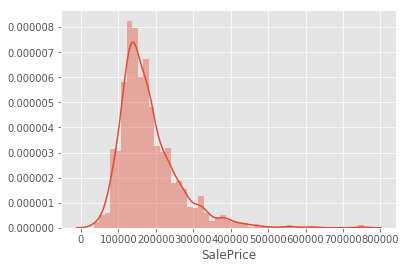

In [59]:
sns.distplot(train['SalePrice']);

### What a nice lognormal distribution, as expected

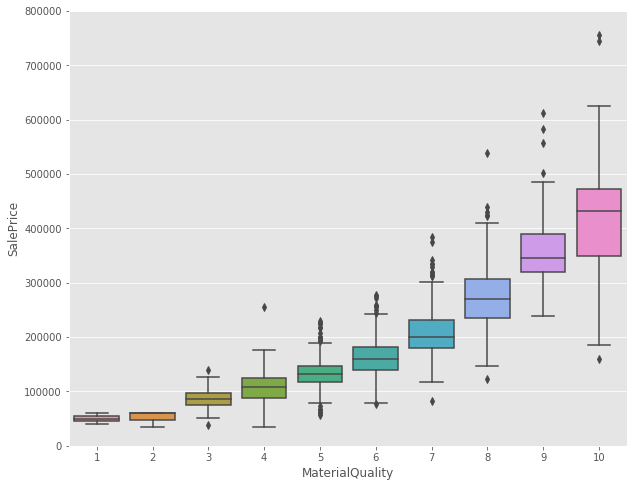

In [60]:
var = 'MaterialQuality'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

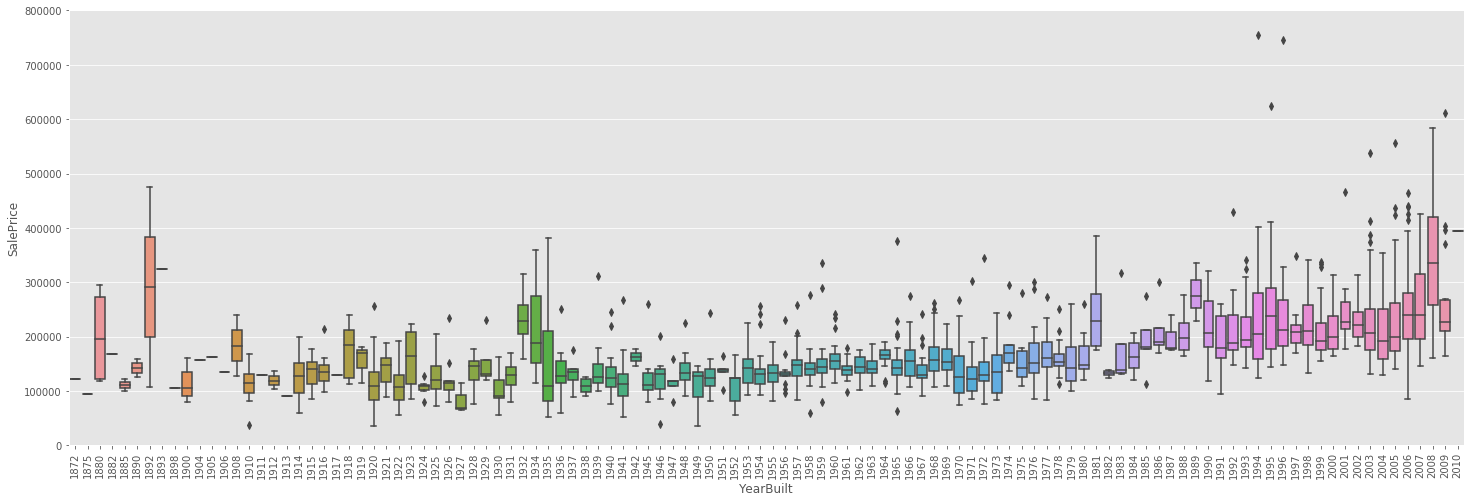

In [61]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Newer housers are generally sold for more than older houses

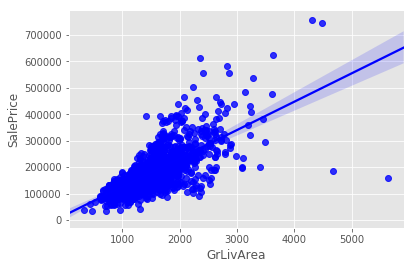

In [62]:
var='GrLivArea'
sns.regplot(x=var, y='SalePrice', color='blue', data=train, ci=95);

### There are several outliers that should be removed

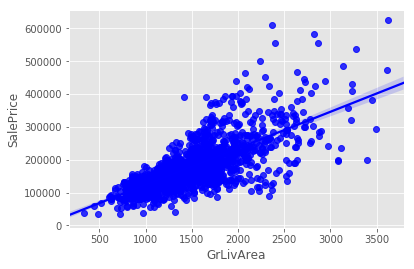

In [92]:
temp = train.copy()
train = train.loc[train['GrLivArea'] < 4000]
sns.regplot(x=var, y='SalePrice',color='blue', data=temp, ci=95);

### That's better! The confidence interval bands are less fat. I'm pretty sure this means that we are more confident that 95% of all the regression lines from all the samples we could take will fall in those (smaller) bands

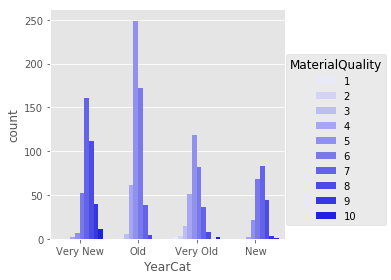

In [64]:
year_cats = []
for year in train['YearBuilt']:
    if year < 1950:
        year_cats.append('Very Old')
    elif year < 1980:
        year_cats.append('Old')
    elif year < 2000:
        year_cats.append('New')
    else:
        year_cats.append('Very New')

train = train.assign(YearCat=year_cats)     
sns.factorplot(kind='count', x='YearCat', color='blue', hue='MaterialQuality', data=train, ci=95);

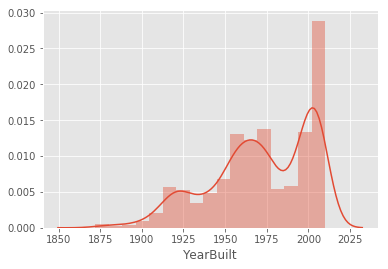

In [65]:
sns.distplot(train.YearBuilt)

### Looks like there are more new buildings built in last 20 years (peak is greatest), but there is more old buildings in general

In [66]:
categorical_features

Index(['ZoningClass', 'RoadAccessType', 'LotShape', 'Flatness', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'ProximityToRoadRail1',
       'ProximityToRoadRail2', 'BldgType', 'HouseStyle', 'RoofType',
       'RoofMaterial', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'HeatingType', 'HeatingQualityCond', 'CentralAir',
       'Electrical', 'KitchenQual', 'HomeFunctionalRating', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

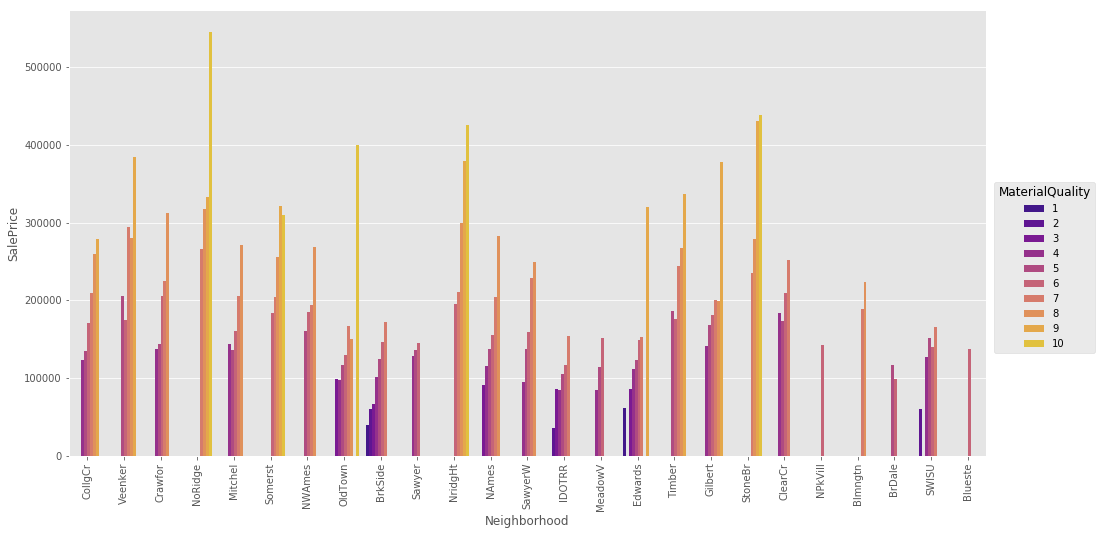

In [67]:
g= sns.factorplot(kind='bar',x='Neighborhood', y="SalePrice", hue='MaterialQuality', data=train, 
                  palette='plasma',ci=None, size=7, aspect=2);
g.set_xticklabels(rotation=90);

### It looks like there is definitely some nicer neighborhoods (NoRidge, StoneBr, and NridgHt) and some not so nice ones (BrkSide, Sawyer, IDOTR) based on MaterialQuality. In general, the "nicer" neighborhoods are higher priced, and vice versa for "not so nice" neighborhoods". This explains the high correlation between the MaterialQuality and SalePrice, and it holds when categorized by neighborhood. 

In [68]:
half_baths = ['HalfBath', 'BsmtHalfBath']
for i in half_baths:
    train[i] = train[i] / 2

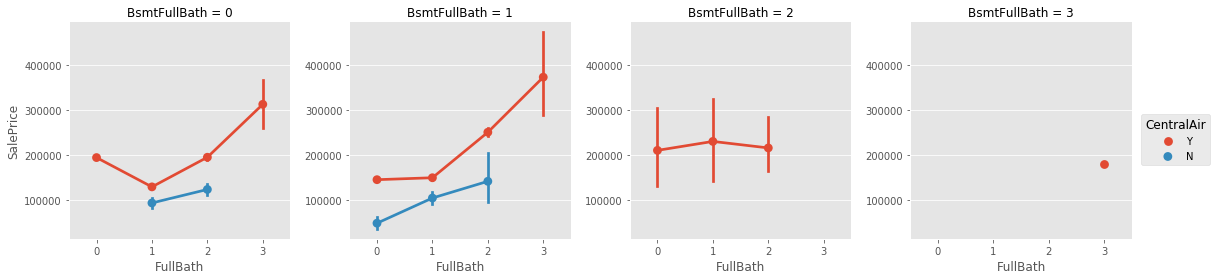

In [69]:
sns.factorplot(x='FullBath', y='SalePrice', data=train, hue='CentralAir', col='BsmtFullBath');

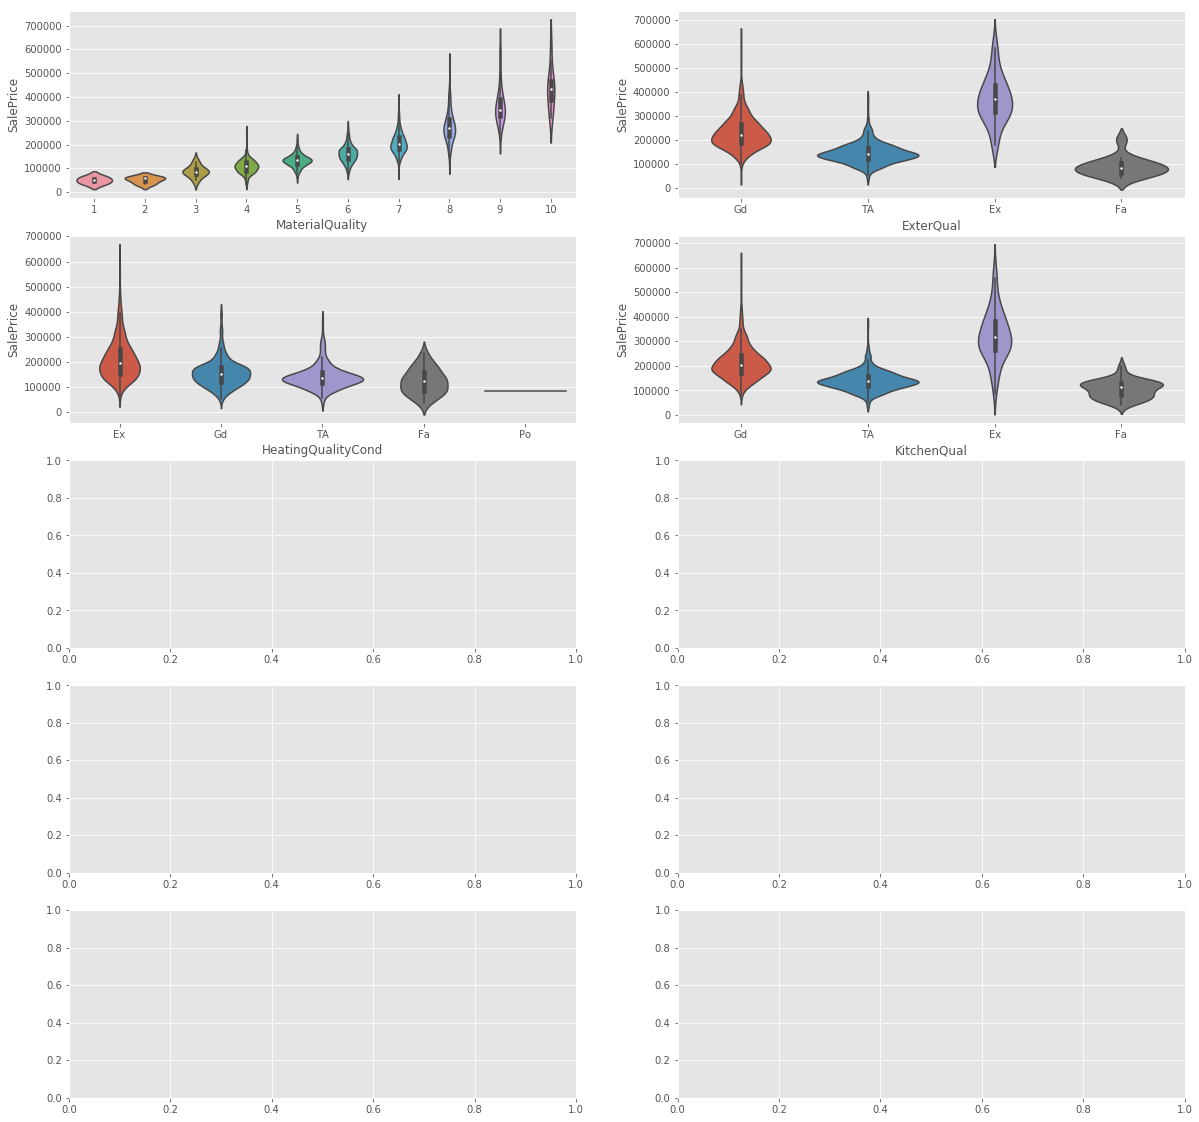

In [70]:
fig, ax =plt.subplots(5,2, figsize=(20, 20)) # <--------- figsize is very important here!!! 
ax = np.ndarray.flatten(ax)
qual_features = [col for col in train.columns if 'Qual' in col and col != 'LowQualityFinshedSF']
f_plots = qual_features
for i in range(len(f_plots)):
    sns.factorplot(kind='violin', x=f_plots[i], y='SalePrice', data=train, ax=ax[i])
for i in range(2, len(f_plots) + 2):
    plt.close(i)

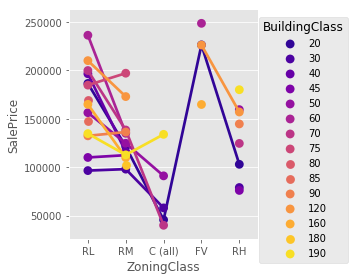

In [71]:
# Seems like essentially all types of homes that are in commercial areas are cheaper 
sns.factorplot(x='ZoningClass', y='SalePrice', data=train, hue='BuildingClass', palette='plasma', ci= None)

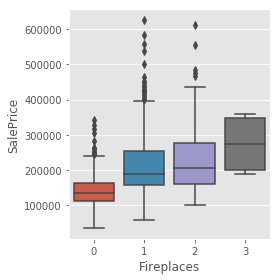

In [72]:
# # of fireplaces seems to have some correlation with SalePrice
sns.factorplot(kind='box', data=train, x='Fireplaces', y='SalePrice');

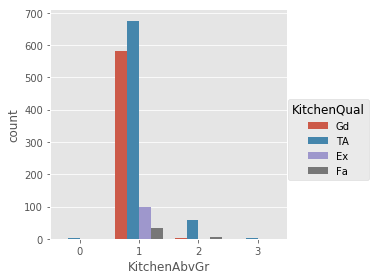

In [73]:
sns.factorplot(kind='count', data=temp, x='KitchenAbvGr', hue='KitchenQual');

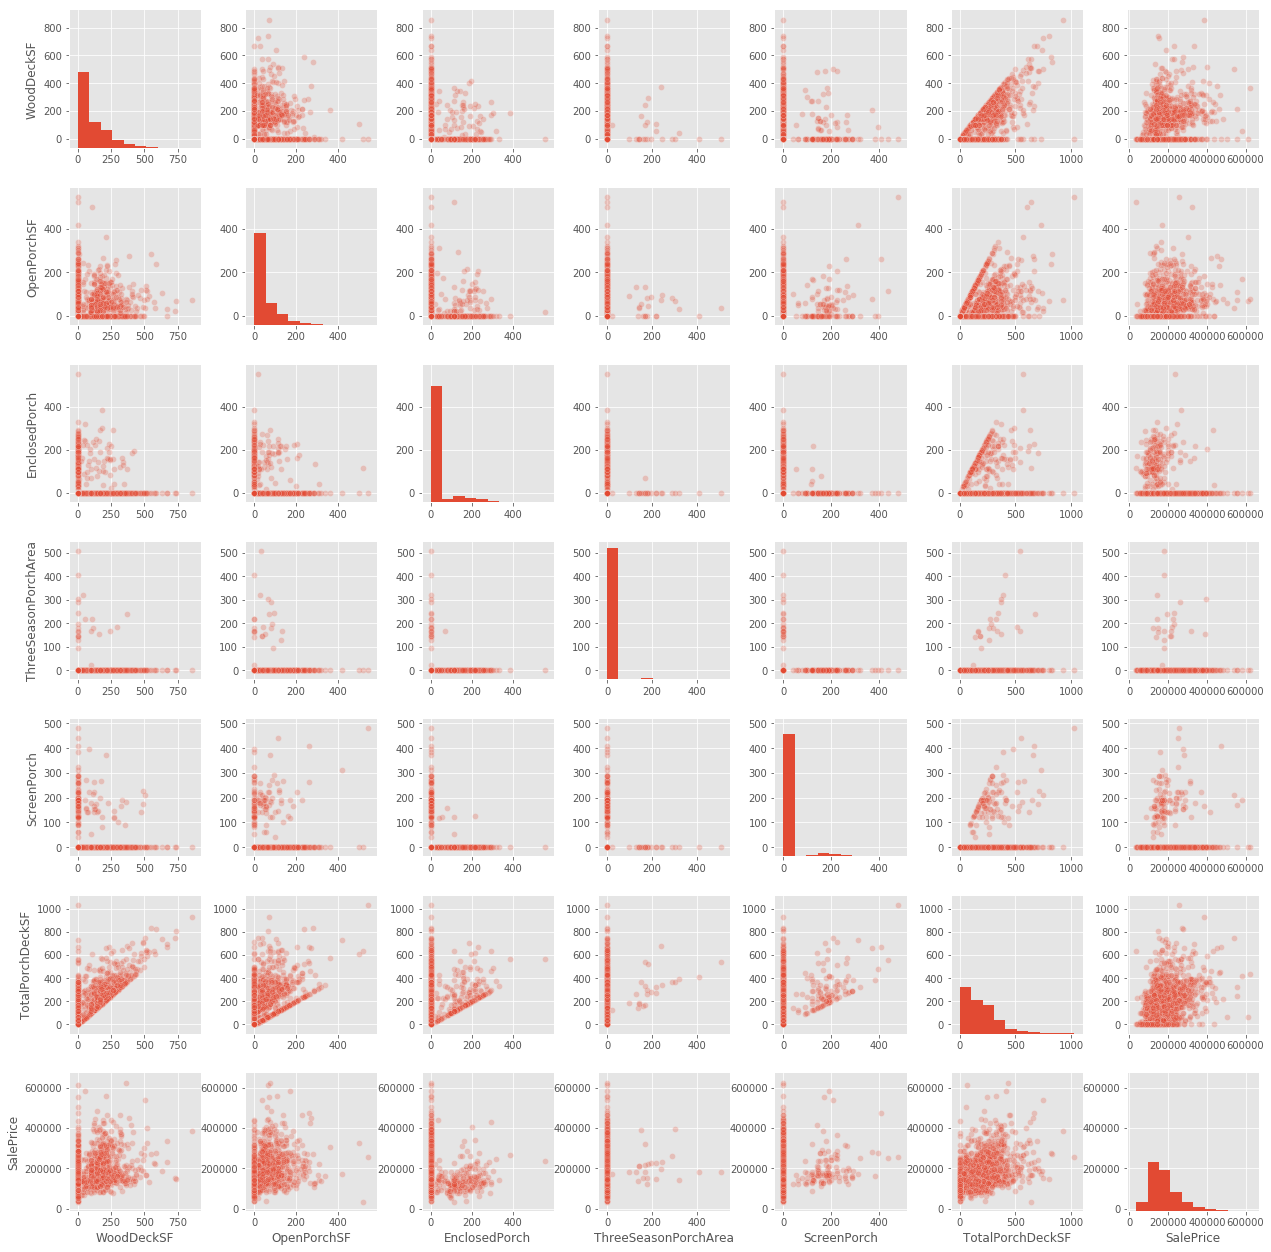

In [74]:
porch_and_deck_features = [f for f in train.columns if 'Deck' in f or 'Porch' in f]
temp=train.copy()
temp['TotalPorchDeckSF'] = 0
for f in porch_and_deck_features:
    temp['TotalPorchDeckSF'] += train[f]
    
# deep copy the array 
p_f_with_sale_price = porch_and_deck_features[:]
p_f_with_sale_price.extend(['TotalPorchDeckSF','SalePrice'])
sns.pairplot(temp[p_f_with_sale_price], plot_kws={'alpha': .25});

### Based on the pairplot, the TotalPorchDeckSF would be a good feature to add, the others in the pairplot can be dropped

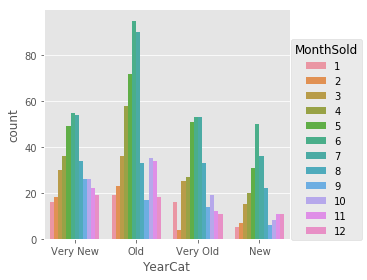

In [75]:
sns.factorplot(kind='count', x='YearCat', data=train, hue='MonthSold');

A lot more homes are sold in spring and summer than other times of the year. This holds throughout the decades

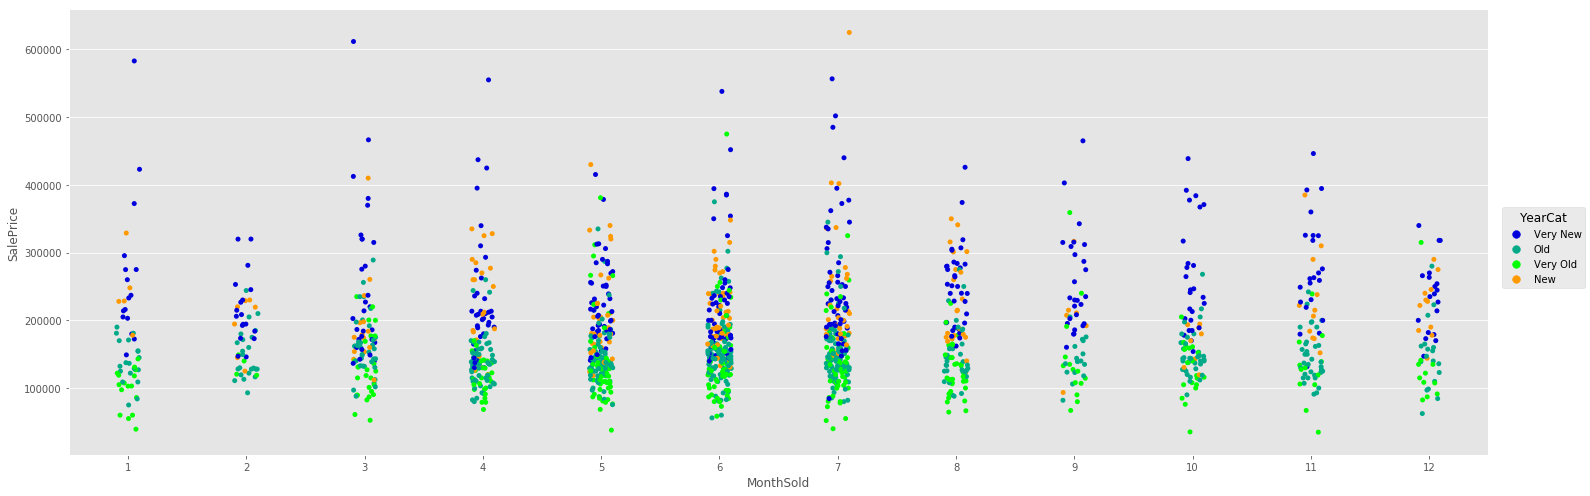

In [76]:
sns.factorplot(kind='strip',x='MonthSold', y='SalePrice', data=train, hue='YearCat', 
               palette='nipy_spectral', aspect=3, size = 7, ci=None, jitter=True);

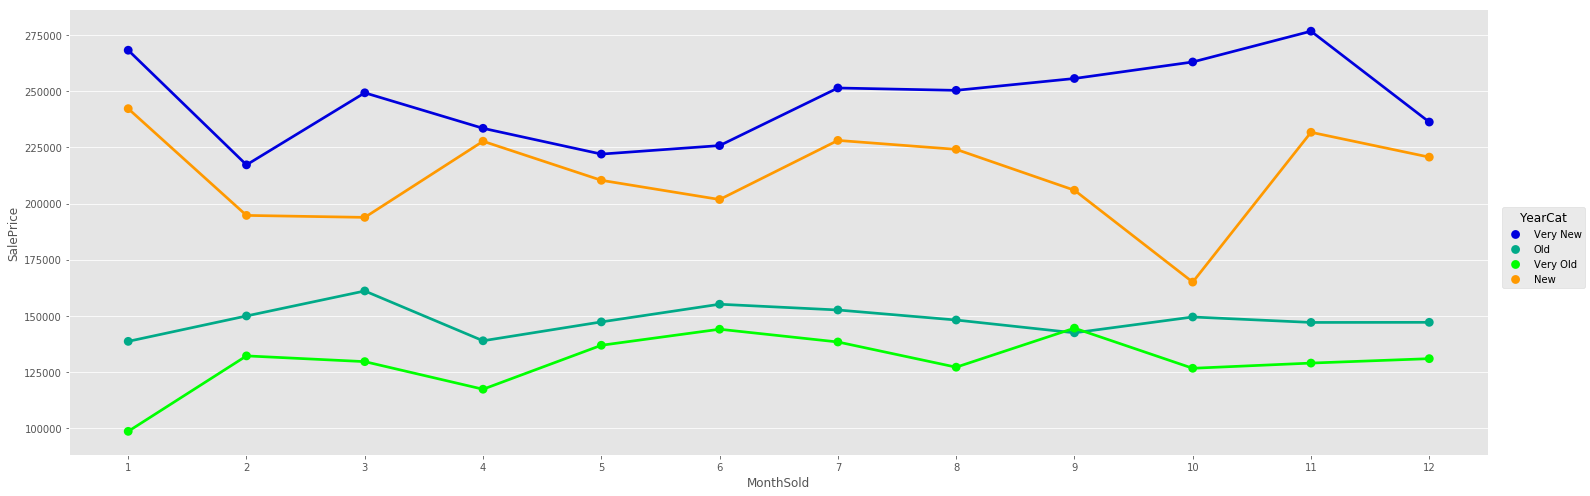

In [77]:
sns.factorplot(x='MonthSold', y='SalePrice', data=train, hue='YearCat', 
               palette='nipy_spectral', aspect=3, size = 7, ci=None);

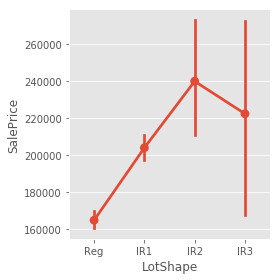

In [78]:
sns.factorplot(data=train, x='LotShape', y='SalePrice', ci=95);

Correlation before removing outliers: 0.26986128306
Correlation after removing outliers: 0.36995077582


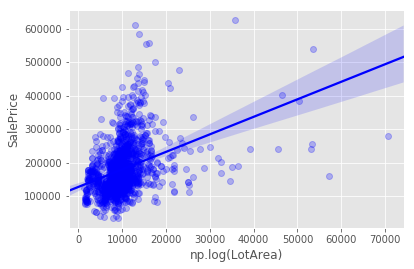

In [79]:
temp = train.copy()
print('Correlation before removing outliers:', temp.LotArea.corr(temp['SalePrice']))
temp = temp.loc[temp['LotArea'] <= 100000]
sns.regplot(x='LotArea', data=temp,y='SalePrice', color='blue', scatter_kws={'alpha':.25})
plt.xlabel('np.log(LotArea)')
print('Correlation after removing outliers:', temp.LotArea.corr(temp['SalePrice']))

### Seems like LotShape is a good indicator of SalePrice, and we will do a log transform of the LotArea below

## Feature Engineering via combining variables

In [80]:
# Square Feet Features
train['TotalSquareFeet'] = train['GrLivArea'] + train['TotalBsmtSF']
train['BathTotal'] = train['FullBath'] + train['HalfBath']
train['BsmtBathTotal'] = train['BsmtFullBath'] + train['BsmtHalfBath']
train['TotalBsmtFinSF'] = train['BsmtFinSF2'] + train['BsmtFinSF1']

train['OverallQuality'] = train['MaterialQuality'] * train['ConditionRating']

qual_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['ExterCond'] = train['ExterCond'].map(qual_mapping)
train['ExterQual'] = train['ExterQual'].map(qual_mapping)
train['ExteriorScore'] = train['ExterCond'] + train['ExterQual']

train['KitchenQual'] = train['KitchenQual'].map(qual_mapping)
train['KitchenScore'] = train['KitchenQual'] * train['KitchenAbvGr']

train['LotArea'] = np.log(train['LotArea'])
train = train.loc[train['LotArea'] <= 100000]

porch_and_deck_features = [f for f in train.columns if 'Deck' in f or 'Porch' in f]
train['TotalPorchDeckSF'] = 0
for f in porch_and_deck_features:
    train['TotalPorchDeckSF'] += train[f]

new_features = [
    'TotalSquareFeet','BathTotal', 'BsmtBathTotal',
    'TotalBsmtFinSF', 'BasementFloorScore','BasementScore',
    'ExteriorScore', 'GarageScore', 'OverallQuality', 'PoolScore',
    'KitchenScore', 'FireplaceScore'
]

# variables to drop
to_drop = [
    '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'GrLivArea', 'TotalBsmtSF',
    'LowQualityFinshedSF', 'BsmtUnfSF','BsmtFinSF1','BsmtFinSF2',
    'MaterialQuality', 'ConditionRating', 
    'GarageCars', 'GarageArea', 'PoolArea', 
    'HomeFunctionalRating', 'KitchenQual', 'KitchenAbvGr', 'Fireplaces', 
    'LandSlope', 'YearSold', 'MonthSold'
]
# Drop all porch and deck features since we added TotalPorchDeckSF
to_drop.extend(porch_and_deck_features)
# TEMPORARY! REMOVE LATER!
#to_drop.extend(new_features)
#temp = train.copy()
#train = train.drop(labels=to_drop, axis=1)
#temp = temp.drop(labels=to_drop, axis=1)

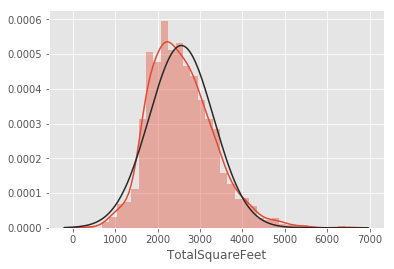

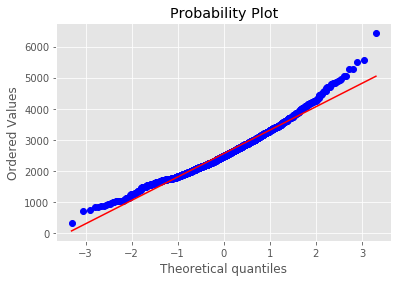

In [81]:
sns.distplot(train['TotalSquareFeet'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalSquareFeet'], plot=plt)

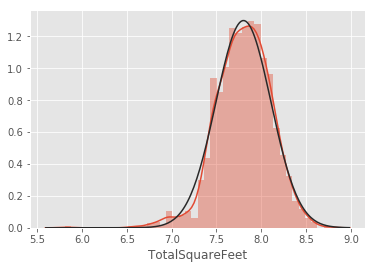

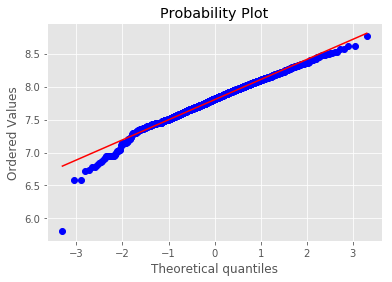

In [82]:
train['TotalSquareFeet'] = np.log(train['TotalSquareFeet'])
sns.distplot(train['TotalSquareFeet'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalSquareFeet'], plot=plt)

## Need to handle missing data specific to test dataset but since we are using an ensemble method (random forest), we can worry about this later. Let's go ahead and check out how our model does. Also, need to transform category columns to numerical encoded category columns

In [83]:
# Use categorical_features and numerical_features, need to rebuild them because of feature selection/engineering
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
temp = train.copy()
for column in categorical_features:
    le = preprocessing.LabelEncoder()
    temp[column] = le.fit_transform(train[column])
    #test[column] = le.fit_transform(test[column])


target = temp['SalePrice']
train_no_target = temp.drop(labels=['SalePrice'], axis=1)
from sklearn.preprocessing import StandardScaler
numerical_features_no_target = list(numerical_features[:])
numerical_features_no_target.remove('SalePrice')
train_std = StandardScaler().fit_transform(train_no_target) 

In [84]:
train_no_target.isnull().any().any()

False

In [85]:
random_forest_baseline = RandomForestRegressor(n_estimators=1000, min_samples_split=3, oob_score=True, n_jobs=-1, random_state=42)
random_forest_baseline.fit(train_std, target)
y_oob = random_forest_baseline.oob_prediction_
print('explained_variance_score = ', metrics.explained_variance_score(target, y_oob))
print('mean_absolute_error = ', metrics.mean_absolute_error(target, y_oob))

explained_variance_score =  0.898511169785
mean_absolute_error =  15757.7485508


## So thus far, filling in missing data has not improved the model. This could be expected because of the feature importances laid out by the random forest (most were unimportant). Let's do some feature selection or, for the sake of fancy terminology, dimensionality reduction

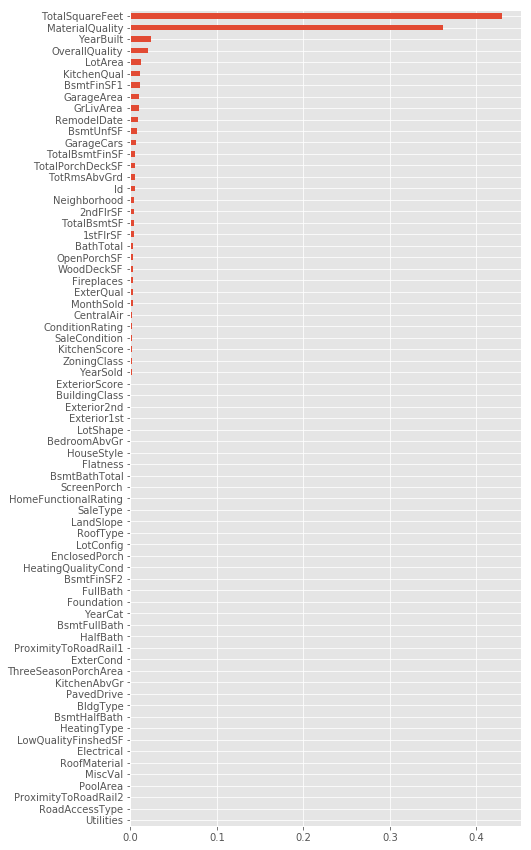

In [86]:
feature_importances = eda.feature_importances(random_forest_baseline, train_no_target)

### Let's attempt to reduce the dimensionality with PCA

In [87]:
train_no_target.head()
train_no_target.dtypes

Id                        int64
BuildingClass             int64
ZoningClass               int64
LotArea                 float64
RoadAccessType            int64
LotShape                  int64
Flatness                  int64
Utilities                 int64
LotConfig                 int64
LandSlope                 int64
Neighborhood              int64
ProximityToRoadRail1      int64
ProximityToRoadRail2      int64
BldgType                  int64
HouseStyle                int64
MaterialQuality           int64
ConditionRating           int64
YearBuilt                 int64
RemodelDate               int64
RoofType                  int64
RoofMaterial              int64
Exterior1st               int64
Exterior2nd               int64
ExterQual                 int64
ExterCond                 int64
Foundation                int64
BsmtFinSF1                int64
BsmtFinSF2                int64
BsmtUnfSF                 int64
TotalBsmtSF               int64
HeatingType               int64
HeatingQ

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(train_no_target, target, test_size=0.33, random_state=42)
lr = LinearRegression()

In [89]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
train_pca = pd.DataFrame(estimator.fit_transform(train_no_target))
random_forest_baseline = RandomForestRegressor(n_estimators=1000, min_samples_split=3, oob_score=True, n_jobs=-1, random_state=42)
random_forest_baseline.fit(train_pca, target)
y_oob = random_forest_baseline.oob_prediction_
print('explained_variance_score = ', metrics.explained_variance_score(target, y_oob))
print('mean_absolute_error = ', metrics.mean_absolute_error(target, y_oob))

explained_variance_score =  0.766001001037
mean_absolute_error =  24634.5965551


In [90]:
train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,139.905691,-145.759976,781.132782,-143.348831,-737.990157,-180.519609,-51.782236,-56.608714,-190.032712,2.009513
1,672.093791,-620.618141,-153.554718,-16.507291,-721.379320,-83.042683,-28.898192,101.454676,179.515005,-99.646986
2,-40.499603,201.927047,586.707185,-109.587854,-735.255850,-165.075396,-47.614549,-31.999961,-233.367460,-17.343809
3,-381.607749,317.592220,435.417968,-87.683136,-734.550691,20.296114,-61.741865,172.558286,-73.102390,191.164650
4,480.254880,588.251713,739.428730,-121.320742,-729.837435,-156.846690,-23.443603,204.419828,-132.593713,-35.438653
